## ML_Zoomcamp Homework2 : Car Price Prediction 

In [1]:
import pandas as pd
import numpy as np 

## Data Preparation 

In [2]:
# import & load the dataset : we will use the California Housing Prices dataset from Kaggle.

!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
housing_data = pd.read_csv('housing.csv')  


Saved under housing (4).csv


In [3]:
housing_data.head() 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Exploratory Data Analysis

In [5]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Distribution of prices 

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

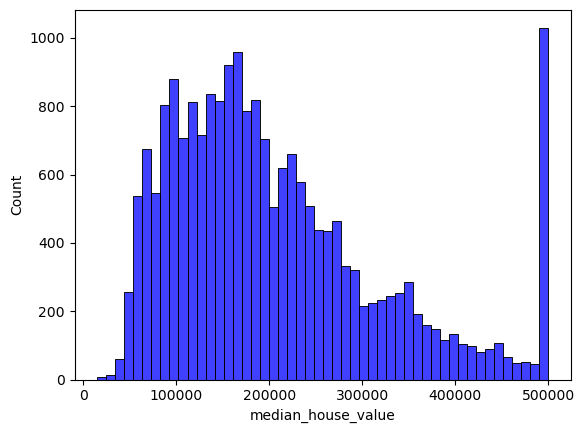

In [7]:
sns.histplot(housing_data.median_house_value, bins=50, color='blue') # it doesn't have  a long tail

In [8]:
housing_data = housing_data.loc[:, housing_data.columns != 'ocean_proximity'] # Exclude the last column
housing_data.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### 1.Find a feature with missing values. How many missing values does it have?

In [9]:
housing_data.isnull().sum() # the 'total_bedrooms' column has 207 missing value 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### 2.                                                                                                                                                                                   What's the median (50% percentile) for variable 'population'?

In [10]:
pop_median = housing_data.population.median()
pop_median

1166.0

### Split the data 

In [11]:
# Split the data :
#training sets : 60% distrubution  
#validation sets : 20% distribution
#test sets : 20% distribution

np.random.seed(42)

n = len(housing_data)
n_val = int(n* 0.2)
n_test =  int(n * 0.2 )
n_train = n-( n_val+ n_test  )

### Shuffle the data 

In [12]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [13]:
dh_train = housing_data.iloc[idx[:n_train]]
dh_val = housing_data.iloc[idx[n_train: n_train+ n_val]]
dh_test = housing_data.iloc[idx[n_train + n_val:]]
dh_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


### Separate target value 'median_house_value' and remove it

In [14]:
y_train =  dh_train['median_house_value']
y_val =  dh_val['median_house_value']
y_test = dh_test['median_house_value']

In [15]:
del  dh_train['median_house_value']
del  dh_val['median_house_value']
del  dh_test['median_house_value']

### Apply the log transformation to the median_house_value variable using the np.log1p() function

In [16]:
y_train =  np.log1p(y_train.values)
y_val =  np.log1p(y_val.values)
y_test =  np.log1p(y_test.values)

### Question 3
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Linear regression (Filling missing data with 0)

In [18]:
def prepare_X(housing_data):
    X= housing_data.copy()
    X = X.fillna(0).values
    return X

X_train = prepare_X(dh_train)
w_0, w = train_linear_regression(X_train , y_train)

In [19]:
y_pred = w_0 + X_train.dot(w)

In [20]:
# Root Mean Squared Error 
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [21]:
X_val = prepare_X(dh_val) #  Use the validation dataset to evaluate the model
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
round(score,2)

0.33

#### Linear regression (Filling missing data with mean )

In [22]:
def prepare_X(housing_data,mean):
    X = housing_data.copy()
    X = X.fillna(mean).values
    return X

total_bedrooms_mean = dh_train['total_bedrooms'].mean()
X_train = prepare_X(dh_train,total_bedrooms_mean)
w_0, w = train_linear_regression(X_train , y_train)

In [23]:
X_val = prepare_X(dh_val,total_bedrooms_mean)
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
round(score,2)

# : The rmse score is equally good at filling in the missing values with 0 and with the mean.

0.33

### Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

In [24]:
def train_linear_regression_reg (X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [25]:
def prepare_X(housing_data):
    X =housing_data.copy()
    X = X.fillna(0).values
    return X

r= [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,100]

#prepare DF
X_train = prepare_X(dh_train)
X_val = prepare_X(dh_val)
for r in r:
    #Train model    
    w_0, w = train_linear_regression_reg(X_train , y_train,r)
    #Prediction    
    y_pred = w_0 + X_val@w

    score =rmse(y_val, y_pred)
    print(f'the rmse score with r:{r} is',round(score,2))

the rmse score with r:0 is 0.33
the rmse score with r:1e-06 is 0.33
the rmse score with r:0.0001 is 0.33
the rmse score with r:0.001 is 0.33
the rmse score with r:0.01 is 0.33
the rmse score with r:0.1 is 0.33
the rmse score with r:1 is 0.33
the rmse score with r:5 is 0.34
the rmse score with r:10 is 0.34
the rmse score with r:100 is 0.34


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [26]:
def train_val_test(seed):
    
    np.random.seed(seed)

    n = len(housing_data)
    n_val = int(n* 0.2)
    n_test =  int(n * 0.2 )
    n_train = n-( n_val+ n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    dh_train = housing_data.iloc[idx[:n_train]]
    dh_val = housing_data.iloc[idx[n_train: n_train+ n_val]]
    dh_test = housing_data.iloc[idx[n_train + n_val:]]
    
    y_train =  dh_train['median_house_value']
    y_val =  dh_val['median_house_value']
    y_test = dh_test['median_house_value']
    
    del  dh_train['median_house_value']
    del  dh_val['median_house_value']
    del  dh_test['median_house_value']
    
    y_train = np.log1p(y_train.values)
    y_val = np.log1p(y_val.values)
    y_test = np.log1p(y_test.values)
    
    
    return dh_train, dh_val, dh_test, y_train, y_val, y_test

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores =[]

for seed in seeds:
    dh_train, dh_val, dh_test, y_train, y_val, y_test = train_val_test(seed)
    X_train = prepare_X(dh_train)
    #Train model
    w_0, w = train_linear_regression(X_train , y_train)
    X_val = prepare_X(dh_val)
    
    #Prediction
    y_pred = w_0 + X_val@w

    score =rmse(y_val, y_pred)
    score = round(score,2)
    scores.append(score)


In [27]:
np.array(scores).std()

0.005385164807134491

### Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [28]:
dh_train, dh_val, dh_test, y_train, y_val, y_test = train_val_test(9)

dh_train = pd.concat([dh_train,dh_val])
y_train = np.concatenate((y_train, y_val), axis=0)

X_train = prepare_X(dh_train)
#Train model
w_0, w = train_linear_regression_reg(X_train , y_train,0.001)
X_test = prepare_X(dh_test)

#Prediction
y_pred = w_0 + X_test@w

score =rmse(y_test, y_pred)
round(score,2)

0.35